MODEL TRAINING OF THE CLEANED DATA SET OF ALGERIAN FOREST FIRE

In [138]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [139]:
df =  pd.read_csv('Cleaned_Algerian_forest_fires_dataset.csv')

In [140]:
df.head(2)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0


In [141]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [143]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [144]:
# The day month and year don't have much dependencies in the determination of temprature 
# so we are going to drop the day month and year
df.drop(['day','month','year'],axis = 1 ,inplace=True)

In [145]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [146]:
df['Classes'].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [147]:
## Encoding the Classes feature as 0 for not fire and 1 for fire
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)


In [148]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [149]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [150]:
df['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [151]:
## Let's now train the model such that we consider Fire Weather Index (FWI) as the output that 
## is the dependent feature

X = df.drop(['FWI'],axis=1) # Independent feature
y = df['FWI'] #Dependent Feature

In [152]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [153]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [154]:
## Train Test split
from sklearn.model_selection import train_test_split

Xtrain , Xtest , yTrain , yTest  = train_test_split(X,y,test_size=0.25,random_state=12)

In [155]:
Xtrain.shape, Xtest.shape, yTrain.shape, yTest.shape

((182, 11), (61, 11), (182,), (61,))

In [156]:
## Features Selection on the basis of correlation 
Xtrain.corr()

## Here the domain expertise set a barrier let say 90% for the correlation. That means that
# all the features that are have correlation 0.9 or above can be neglected or in other words
# they both act in a very similar fashion so we need not to consider both. 

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.664106,-0.284285,-0.332493,0.690245,0.494657,0.398345,0.605002,0.473480,0.532604,0.272439
RH,-0.664106,1.000000,0.216906,0.216026,-0.645477,-0.399374,-0.218684,-0.682805,-0.345577,-0.447035,-0.395779
Ws,-0.284285,0.216906,1.000000,0.198263,-0.164421,-0.001988,0.051831,0.034626,0.020510,-0.015691,-0.120777
Rain,-0.332493,0.216026,0.198263,1.000000,-0.545232,-0.287017,-0.296831,-0.351914,-0.298460,-0.365089,-0.019413
FFMC,0.690245,-0.645477,-0.164421,-0.545232,1.000000,0.597528,0.500046,0.751666,0.586264,0.759940,0.180944
DMC,0.494657,-0.399374,-0.001988,-0.287017,0.597528,1.000000,0.867837,0.683809,0.981026,0.578138,0.192492
DC,0.398345,-0.218684,0.051831,-0.296831,0.500046,0.867837,1.000000,0.502461,0.937199,0.501794,-0.080379
ISI,0.605002,-0.682805,0.034626,-0.351914,0.751666,0.683809,0.502461,1.000000,0.648213,0.755806,0.258948
BUI,0.473480,-0.345577,0.020510,-0.298460,0.586264,0.981026,0.937199,0.648213,1.000000,0.580292,0.087681
Classes,0.532604,-0.447035,-0.015691,-0.365089,0.759940,0.578138,0.501794,0.755806,0.580292,1.000000,0.125855


<Axes: >

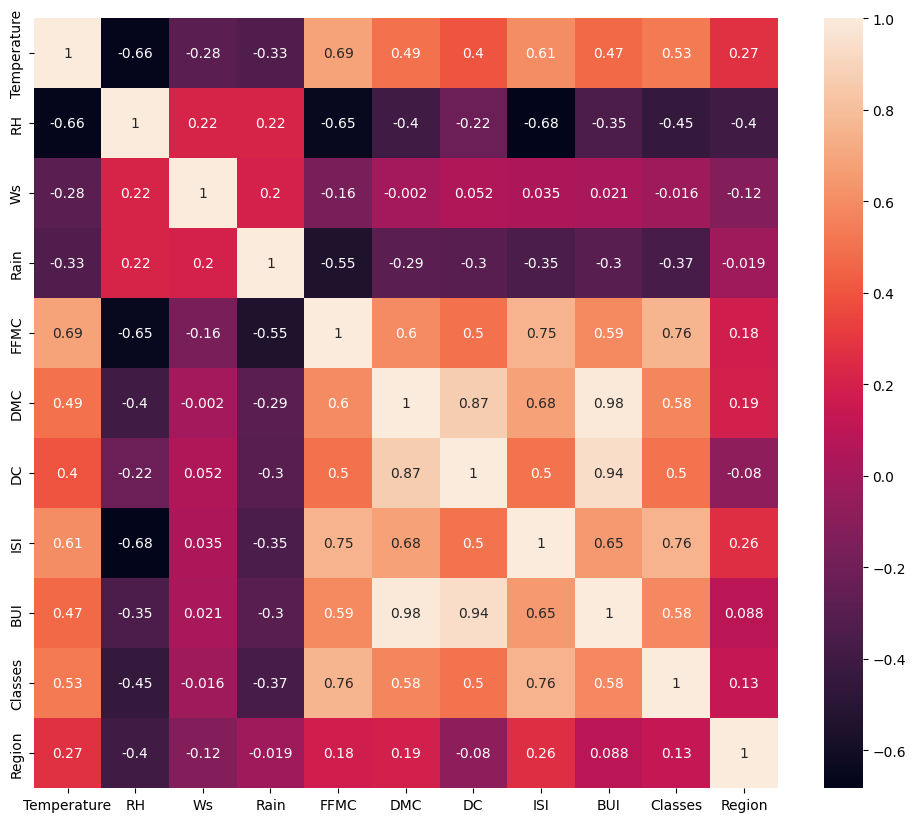

In [157]:
## Checking for the multicollinearity
plt.figure(figsize=(12,10))
corr = Xtrain.corr()
sns.heatmap(corr,annot=True)

In [158]:
## Writing the function that will find the features with the multicollinearity

def correlation(dataset , threshold):
    colCorrelation = set()
    correlationMatrix = dataset.corr()
    for i in range(len(correlationMatrix.columns)):
        for j in range (i):
            if abs(correlationMatrix.iloc[i,j]) > threshold:
                colName = correlationMatrix.columns[i]
                colCorrelation.add(colName)
    
    return colCorrelation

In [159]:
correlatedFeatures = correlation(df,0.85)

In [160]:
correlatedFeatures

{'BUI', 'DC', 'FWI'}

In [161]:
## Here we may observe that the BUI and DC have high correlation
## So we may drop BUI and DC since they are highly correlated to FWI
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [162]:
Xtrain.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
51,28,79,18,0.1,73.4,16.4,79.9,1.8,21.7,0,0
41,31,75,13,0.1,75.1,7.9,27.7,1.5,9.2,0,0
86,31,78,18,0.0,85.8,45.6,190.6,4.7,57.1,1,0
183,40,34,14,0.0,93.3,10.8,21.4,13.8,10.6,1,1
219,31,62,15,0.0,83.3,5.8,17.7,3.8,6.4,1,1


In [163]:
## Dropping the correlatedFeatures from the training and testing data
Xtrain.drop(['BUI','DC'],axis = 1,inplace=True)
Xtest.drop(['BUI', 'DC'], axis = 1,inplace=True)

In [164]:
Xtrain.shape,Xtest.shape

((182, 9), (61, 9))

In [165]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
XtrainScaled = scaler.fit_transform(Xtrain)
XtestScaled  = scaler.transform(Xtest )

In [166]:
XtrainScaled

array([[-1.20979237,  1.14254681,  0.88586306, ..., -0.72823871,
        -1.12915898, -0.96755889],
       [-0.34065206,  0.86712493, -0.88586306, ..., -0.80391788,
        -1.12915898, -0.96755889],
       [-0.34065206,  1.07369134,  0.88586306, ...,  0.00332656,
         0.88561489, -0.96755889],
       ...,
       [-0.6303655 , -0.71655088, -0.17717261, ..., -0.82914426,
        -1.12915898,  1.03352882],
       [ 0.52848824, -0.30341806,  0.88586306, ...,  0.83579738,
         0.88561489,  1.03352882],
       [ 1.10791512, -0.50998447, -0.88586306, ..., -0.24893733,
         0.88561489, -0.96755889]])

Making Box Plot to see the effect of standard scaling

Text(0.5, 1.0, 'After Scaling')

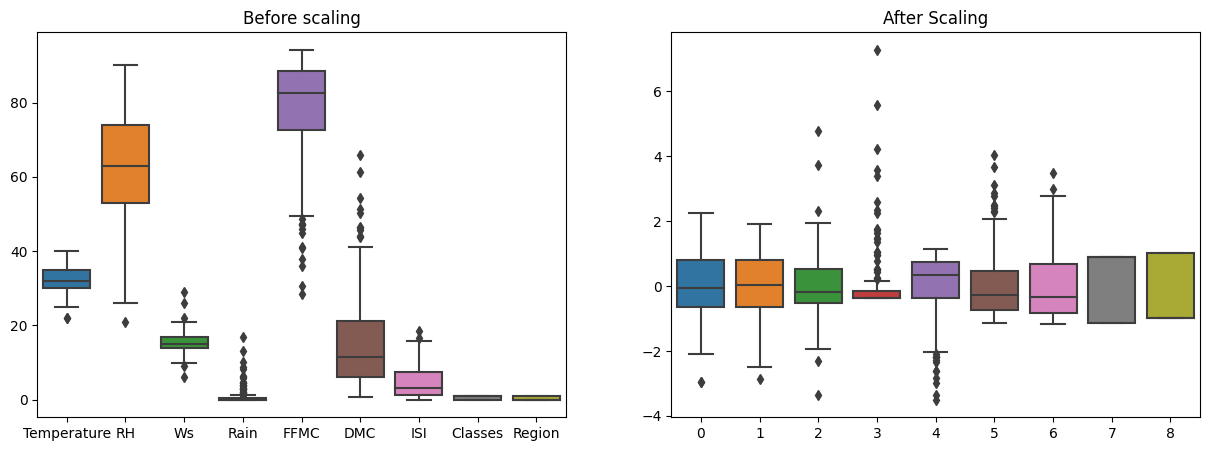

In [167]:
plt.subplots(figsize = ((15,5)))
plt.subplot(1, 2 , 1)
sns.boxplot(data = Xtrain)
plt.title('Before scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=XtrainScaled)
plt.title("After Scaling")

### LINEAR REGRESSION MODEL

Mean absolute error: 0.8750921432093286
Mean squared error: 4.239551563600268
R2 score 0.9243229068752971


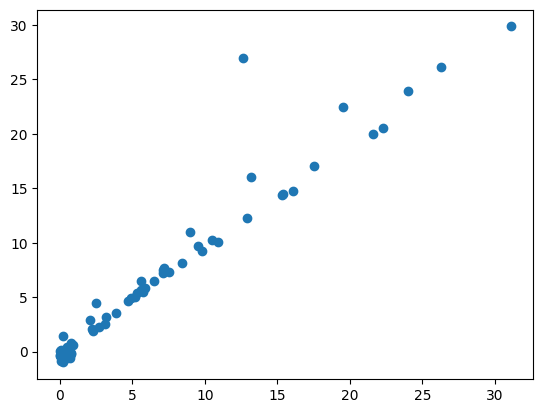

In [169]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linReg = LinearRegression()
linReg.fit(XtrainScaled,yTrain)
ypred = linReg.predict(XtestScaled)
mae = mean_absolute_error(yTest,ypred)
mse = mean_squared_error(yTest, ypred)
score = r2_score(yTest,ypred)                   
print ("Mean absolute error:",mae)
print("Mean squared error:", mse)
print("R2 score",score)
plt.scatter(yTest,ypred)

### LASSO REGRESSION

Mean absolute error: 1.247995140192621
Mean squared error: 4.119728769756408
R2 score 0.9264617747702033


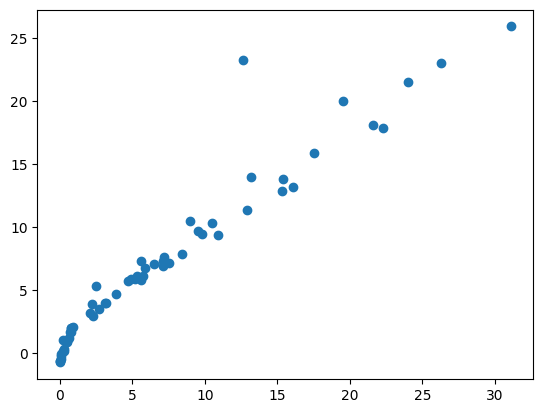

In [180]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

lasso = Lasso()
lasso.fit(XtrainScaled,yTrain)
ypred = lasso.predict(XtestScaled)

mae = mean_absolute_error(yTest,ypred)
mse = mean_squared_error(yTest, ypred)
score = r2_score(yTest,ypred)               
print ("Mean absolute error:",mae)
print("Mean squared error:", mse)
print("R2 score",score)
plt.scatter(yTest,ypred)

In [199]:
from sklearn.linear_model import LassoCV
lassocv  = LassoCV(cv = 10)
lassocv.fit(XtrainScaled,yTrain)

LassoCV(cv=10)

In [200]:
lassocv.alpha_

0.017063601425315583

In [201]:
lassocv.alphas_

array([6.88860534e+00, 6.42433640e+00, 5.99135763e+00, 5.58756018e+00,
       5.21097732e+00, 4.85977489e+00, 4.53224233e+00, 4.22678436e+00,
       3.94191324e+00, 3.67624148e+00, 3.42847511e+00, 3.19740736e+00,
       2.98191281e+00, 2.78094187e+00, 2.59351569e+00, 2.41872141e+00,
       2.25570769e+00, 2.10368054e+00, 1.96189951e+00, 1.82967405e+00,
       1.70636014e+00, 1.59135718e+00, 1.48410503e+00, 1.38408132e+00,
       1.29079887e+00, 1.20380335e+00, 1.12267103e+00, 1.04700676e+00,
       9.76442009e-01, 9.10633086e-01, 8.49259464e-01, 7.92022218e-01,
       7.38642572e-01, 6.88860534e-01, 6.42433640e-01, 5.99135763e-01,
       5.58756018e-01, 5.21097732e-01, 4.85977489e-01, 4.53224233e-01,
       4.22678436e-01, 3.94191324e-01, 3.67624148e-01, 3.42847511e-01,
       3.19740736e-01, 2.98191281e-01, 2.78094187e-01, 2.59351569e-01,
       2.41872141e-01, 2.25570769e-01, 2.10368054e-01, 1.96189951e-01,
       1.82967405e-01, 1.70636014e-01, 1.59135718e-01, 1.48410503e-01,
      

In [202]:
lassocv.mse_path_

array([[91.61064236, 46.06929101, 48.64527613, 67.53857426, 35.12793025,
        58.25143388, 48.531481  , 45.43327692, 75.01417014, 31.88245907],
       [88.94527399, 40.2449261 , 42.5074408 , 62.96732706, 30.76834369,
        52.77755537, 43.49050405, 40.24053093, 69.55590648, 28.1138956 ],
       [80.43232636, 35.07951122, 37.09000365, 55.50511057, 26.85859863,
        46.2403167 , 39.07606662, 35.6375476 , 63.2083034 , 24.74885198],
       [72.99952153, 30.56320592, 32.3847    , 49.10945077, 23.38211639,
        40.30284372, 35.07723573, 31.32149305, 57.60365217, 21.51493416],
       [66.50810254, 26.63788358, 28.29836413, 43.63505216, 20.36216755,
        35.14378776, 30.73396645, 27.55972963, 52.65083241, 18.70849573],
       [60.83725546, 23.22634131, 24.75001384, 37.5548359 , 17.73898045,
        30.66138706, 26.94841612, 24.2805575 , 47.0504743 , 16.27330978],
       [55.88178095, 20.26154554, 21.66909721, 32.21502304, 15.46072297,
        26.76711872, 23.64835534, 21.42152795

(0.8726102466871208, 0.9256941350028701)

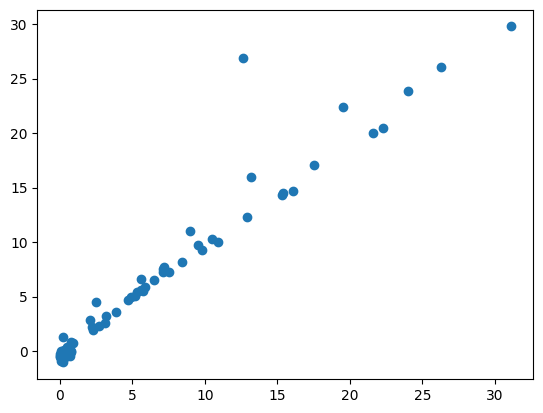

In [203]:
ypred = lassocv.predict(XtestScaled)
plt.scatter(yTest,ypred)
mae = mean_absolute_error(yTest,ypred)
score = r2_score(yTest, ypred)
mae,score

### Ridge Regression

Mean absolute error: 0.877351322689327
Mean squared error: 4.122945679055393
R2 score 0.9264043521062868


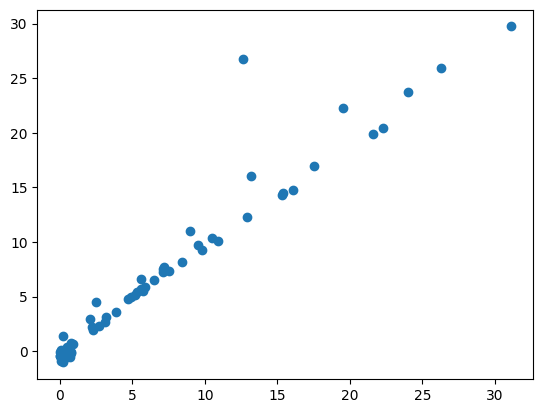

In [207]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

ridge = Ridge()
ridge.fit(XtrainScaled,yTrain)
ypred = ridge.predict(XtestScaled)

mae = mean_absolute_error(yTest,ypred)
mse = mean_squared_error(yTest, ypred)
score = r2_score(yTest,ypred)               
print ("Mean absolute error:",mae)
print("Mean squared error:", mse)
print("R2 score",score)
plt.scatter(yTest,ypred)

Mean absolute error: 0.877351322689327
Mean squared error: 4.122945679055393
R2 score 0.9264043521062868


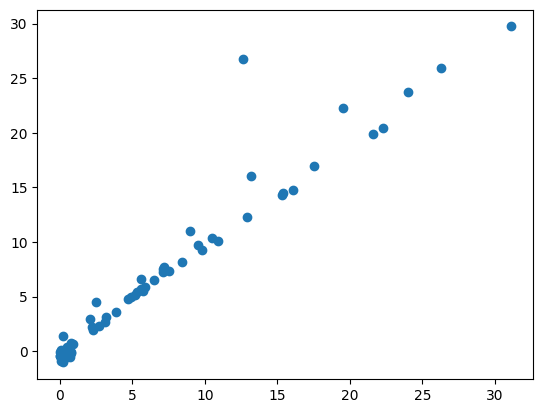

In [212]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

ridgecv = RidgeCV(cv = 5)
ridgecv.fit(XtrainScaled,yTrain)
ypred = ridgecv.predict(XtestScaled)

mae = mean_absolute_error(yTest,ypred)
mse = mean_squared_error(yTest, ypred)
score = r2_score(yTest,ypred)               
print ("Mean absolute error:",mae)
print("Mean squared error:", mse)
print("R2 score",score)
plt.scatter(yTest,ypred)

In [213]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_values': False}

Mean absolute error: 1.8525329575429226
Mean squared error: 6.689765560264014
R2 score 0.8805859526198079


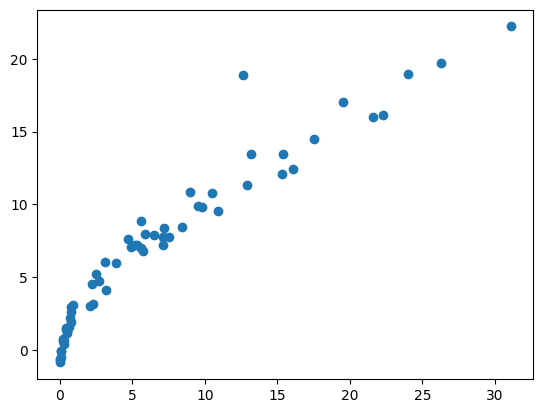

In [214]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

elastic = ElasticNet()
elastic.fit(XtrainScaled,yTrain)
ypred = elastic.predict(XtestScaled)

mae = mean_absolute_error(yTest,ypred)
mse = mean_squared_error(yTest, ypred)
score = r2_score(yTest,ypred)               
print ("Mean absolute error:",mae)
print("Mean squared error:", mse)
print("R2 score",score)
plt.scatter(yTest,ypred)

In [218]:
elastic.alpha

1.0

In [219]:
## Pickling the machine learning and preprocessing model

In [220]:
scaler

StandardScaler()

In [221]:
ridge

Ridge()

In [222]:
import pickle
pickle.dump(scaler, open('scaler.pkl','wb'))
pickle.dump(ridge, open('ridge.pkl','wb'))